## Исследование данных о российском кинопрокате



Планируется работать с данными, опубликованными на портале открытых данных Министерства культуры.
Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

**Задача:**
Изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку.

title — название фильма;

puNumber — номер прокатного удостоверения;

show_start_date — дата премьеры фильма;

type — тип фильма;

film_studio — студия-производитель;

production_country — страна-производитель;

director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма.
puNumber — номер прокатного удостоверения;
box_office — сборы в рублях

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [ ]:
#импортируем библеотеки
import pandas as pd
import seaborn as sns

In [ ]:
# настройки для удобства визуального восприятия
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
# при чтения файла обнаружен object вместо int в puNumber, производжим замену
data_one = pd.read_csv('/datasets/mkrf_movies.csv')

data_one = data_one.drop(data_one[data_one['puNumber'] == 'нет'].index)
data_one['puNumber'] = data_one['puNumber'].astype('int')
data_one.info()
data_one.head(10)





<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия"
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал"
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия"


In [ ]:
#читаем второй дата-фрейм
data_two = pd.read_csv('/datasets/mkrf_shows.csv')

data_two.info()
data_two.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2450.00
1,111000115,61040.00
2,111000116,153030013.40
3,111000117,12260956.00
4,111000118,163684057.79
5,111000119,4293649.51
6,111000212,200.00
7,111000216,355567.00
8,111000313,710.00
9,111000314,1607970.00


In [ ]:
#обьединяем две таблицы и получаем базовую информацию
data = data_one.merge(data_two,on='puNumber',how='left')
data.info()
data.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.00
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интертейнмент Интернэшнл",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [ ]:
data.info() #изучаем тип данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [ ]:
#переводим в нужный формат

data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

data.drop(data[data['ratings'] == '99%'].index,inplace=True)
data.drop(data[data['ratings'] == '83%'].index,inplace=True)
data.drop(data[data['ratings'] == '64%'].index,inplace=True)
data.drop(data[data['ratings'] == '91%'].index,inplace=True)
data.drop(data[data['ratings'] == '94%'].index,inplace=True)
data.drop(data[data['ratings'] == '90%'].index,inplace=True)
data.drop(data[data['ratings'] == '19%'].index,inplace=True)
data.drop(data[data['ratings'] == '88%'].index,inplace=True)
data.drop(data[data['ratings'] == '89%'].index,inplace=True)
data.drop(data[data['ratings'] == '98%'].index,inplace=True)
data.drop(data[data['ratings'] == '79%'].index,inplace=True)
data.drop(data[data['ratings'] == '28%'].index,inplace=True)
data.drop(data[data['ratings'] == '97%'].index,inplace=True)
data.drop(data[data['ratings'] == '62%'].index,inplace=True)
data['ratings'] = pd.to_numeric(data['ratings'])











In [ ]:
data.info() #проверка

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7456 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7456 non-null   object             
 1   puNumber               7456 non-null   int64              
 2   show_start_date        7456 non-null   datetime64[ns, UTC]
 3   type                   7456 non-null   object             
 4   film_studio            7438 non-null   object             
 5   production_country     7454 non-null   object             
 6   director               7447 non-null   object             
 7   producer               6888 non-null   object             
 8   age_restriction        7456 non-null   object             
 9   refundable_support     330 non-null    float64            
 10  nonrefundable_support  330 non-null    float64            
 11  budget                 330 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [ ]:
print(data.isna().sum()) # выяыляем количество пропущенных значений для каждого столбца

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7126
nonrefundable_support    7126
budget                   7126
financing_source         7126
ratings                   966
genres                    972
box_office               4313
dtype: int64


In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );
    except:
        print('пропусков не осталось :) ')

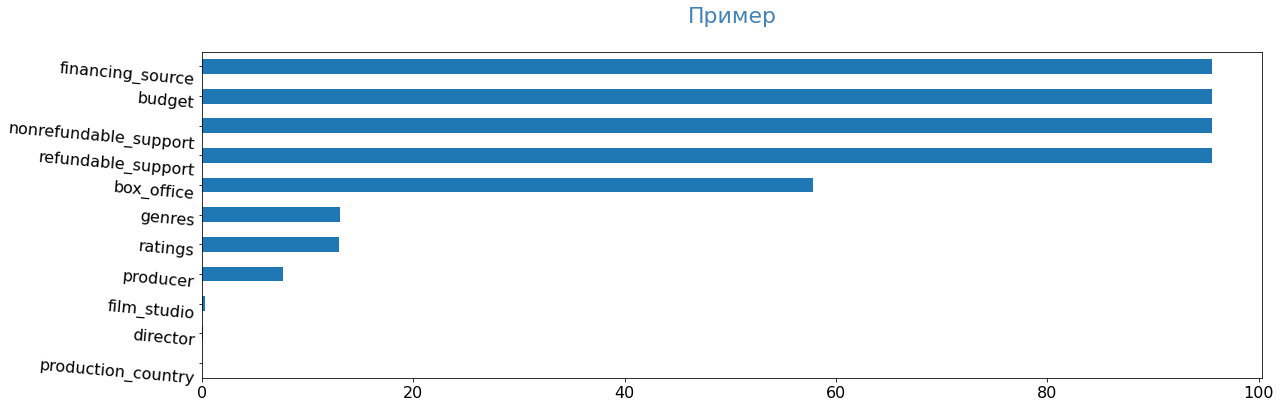

In [ ]:
pass_value_barh(data)

In [ ]:
data['director'] = data['director'].fillna('')
data['director'] = data['director'].astype(str)

data['genres'] = data['genres'].fillna('')
data['genres'] = data['genres'].astype(str)

**Вывод:**
Учитывая идентичесное количество пропусков(7126) в столбцах(refundable_support — объём возвратных средств государственной поддержки;nonrefundable_support — объём невозвратных средств государственной поддержки;financing_source — источник государственного финансирования;budget — общий бюджет фильма) можно сделать вывод, что 2827 фильмов не имели государственной поддержки. Считаю, что заполнять эти данные для нашего исследование не нужно, так как наша задача проанализировать фильмы с государственной поддержкой.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [ ]:
print(data.duplicated().sum()) # определяем наличие дупликатов

0


In [ ]:
data.nunique() # определение неявных дубликатов


title                    6742
puNumber                 7454
show_start_date          1960
type                        8
film_studio              5469
production_country        946
director                 4794
producer                 5328
age_restriction             5
refundable_support         34
nonrefundable_support      74
budget                    289
financing_source            3
ratings                    80
genres                    740
box_office               2924
dtype: int64

In [ ]:
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксьон, Марс Дистрибусьон, Канал +",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роману Донны Вулфольк Кросс/,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне Филис, Икури Филмз, Медуза Фильм, У Эф А Интернэшнл Филм энд Ти Ви Продуцион, Юниверсум Филм",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи-Пи Интертейнмент, Баалтимор Спринг Крик Пикчерз Фейс, Трайбека",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


In [ ]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4504,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай Си Би ИНтертейнмент Финанс, Мэй Бэнч Продакшнз",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.00,"мелодрама,комедия",NaN
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксьон, Донт Би Ши Продакшнз, Франс 3 Синема, Нексус Фэктори, ЮФилм/Фанд, Ла Банк Посталь Имаж 6, Синемаж 7, Канал +, Сине +, Франс Телевизьон, Лё Текс Шелтер Гувернеман Федераль де Бельжик",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксьон, Донт Би Ши Продакшнз, Франс 3 Синема, Нексус Фэктори, ЮФилм/Фанд, Ла Банк Посталь Имаж 6, Синемаж 7, Канал +, Сине +, Франс Телевизьон, Лё Текс Шелтер Гувернеман Федераль де Бельжик",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,"комедия,мелодрама,драма",NaN
6378,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,,NaN
6379,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,,NaN


**Вывод:**
puNumber наверное должен быть уникальным. Под одним номером прокатного удостоверения числятся два разных фильма с одной датой премьеры. Возможно сыграл человеческий фактор при заполнении какой-нибудь формы. Этот номер не имеет принципиального значения, оставлю как есть.
Повторы в title объясняются тем, что один и тот же фильм могут начать показывать в разное время под разной лицензией и/или разными прокатчиками.
show_start_date. Вполне реально начать показ нескольких фильмов в одну и ту же дату.
То же самое касается и всех остальных дубликатов, так что оставляем все как есть.


#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [ ]:
data['type'].str.strip()
data['production_country'].str.strip()
data['film_studio'].str.strip()
data['director'].str.strip()
data['producer'].str.strip()
data['genres'].str.strip()


0          боевик,драма,мелодрама
1                   драма,военный
2       фантастика,боевик,триллер
3       фантастика,боевик,триллер
4       фантастика,боевик,триллер
                  ...            
7480                             
7481               боевик,триллер
7482                             
7483                             
7484              комедия,вестерн
Name: genres, Length: 7456, dtype: object

**Вывод** Общая проблема при исследовании категориальных переменных - это нарушение форматирования(пробелы в начале и конце строки, отсуствие одинакового выравнивания )

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [ ]:
#выявляем неявные фильмы с господдержкой
analysis_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
display(analysis_budget )

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,0.00,Фонд кино,6.60,драма,446163511.00
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,0.00,Фонд кино,7.80,"боевик,драма,криминал",196572438.40
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези",67418974.80
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,0.00,Фонд кино,6.30,"комедия,драма",1957738.51
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,0.00,Фонд кино,5.10,"комедия,мелодрама",72937783.20
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,0.00,Министерство культуры,4.30,комедия,15362931.43
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,0.00,Фонд кино,6.30,"комедия,мелодрама",70299052.00
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,0.00,Фонд кино,5.60,фантастика,1038321489.00


In [ ]:
data['state_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
state_percentage = data['state_support'].median()

data.loc[analysis_budget.index, 'budget'] = (data.loc[analysis_budget.index, 'refundable_support'] + data.loc[analysis_budget.index, 'nonrefundable_support']) / state_percentage

data.loc[analysis_budget.index]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,state_support
2052,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,23000000.00,37363864.68,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016.10,inf
2057,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,75000000.00,121838689.18,Фонд кино,6.60,драма,446163511.00,inf
2471,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.00,70000000.00,129961268.46,Фонд кино,7.80,"боевик,драма,криминал",196572438.40,inf
2531,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.00,0.00,32490317.12,Фонд кино,6.20,"комедия,фэнтези",67418974.80,inf
2614,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.00,100000000.00,259922536.93,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551.40,inf
2683,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,59000000.00,95846435.49,Фонд кино,6.30,"комедия,драма",1957738.51,inf
2787,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,35000000.00,56858054.95,Фонд кино,5.10,"комедия,мелодрама",72937783.20,inf
2873,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,6000000.00,9747095.13,Министерство культуры,4.30,комедия,15362931.43,inf
3046,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,19000000.00,51000000.00,113716109.91,Фонд кино,6.30,"комедия,мелодрама",70299052.00,inf
3564,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,250000000.00,406128963.95,Фонд кино,5.60,фантастика,1038321489.00,inf


In [ ]:
data = data.drop(data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])].index)

**Вывод:** Видно, что есть строки, где budget равен 0, refundable_support и nonrefundable_support нет, так быть не может, потому что очевидно, что эти фильмы получали господдержку. Таких строчек всего 17, так что принципиально на анализ данных они не повлияют. Произведем удаление пропусков.


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [ ]:
data['year'] = data['show_start_date'].dt.year # добавляем столбец о годе проката
print(data['year'])

0       2015
1       2016
2       2016
3       2016
4       2015
        ... 
7480    2019
7481    2019
7482    2019
7483    2019
7484    2019
Name: year, Length: 7456, dtype: int64


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу.
            </div>
        </div>
    </div>
</div>

In [ ]:
def first_value(index):
    index_list = index.split(',')[0]
    return index_list

data['main_director'] = data['director'].apply(first_value)
data['main_genre'] = data['genres'].apply(first_value)

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [ ]:
data['state_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

print('Чаще всего долю от общего бюджета фильма составляет государственная поддержка',(data['state_support'].median())*100)


Чаще всего долю от общего бюджета фильма составляет государственная поддержка 61.54763149797731


### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [ ]:
data['box_office'] = pd.to_numeric(data['box_office'], errors='coerce')


In [ ]:
data['good_box_office'] = data['box_office'] > 0

Доля фильмов, для которых есть информация о сборах: 0.42153969957081544


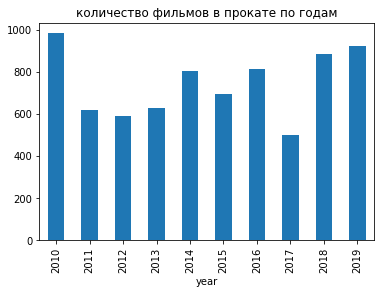

In [ ]:
films_count= data.groupby(by='year')['good_box_office'].agg('count')
films_count.columns = ['count']
films_count.plot(title='количество фильмов в прокате по годам', kind='bar', y='count');
print('Доля фильмов, для которых есть информация о сборах:' ,data.box_office.notna().mean())

**Вывод:** Полнее всего данные представлены в 2010 и 2019 годах.

<div style="border:solid green 2px; padding: 20px">

**Вопрос:**  Я поменяла группировку данных с прокатного удостоверения на дату премьеры('show_start_date'), не понимаю почему снова неправильно

<AxesSubplot:title={'center':'количество фильмов в прокате по годам'}, xlabel='year'>

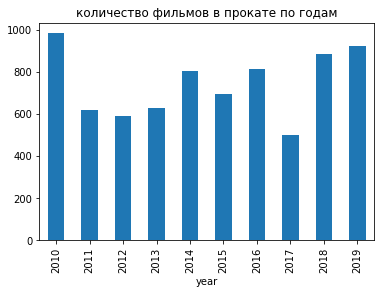

In [ ]:
films_count= data.groupby(by='year')['good_box_office'].agg('count')
films_count.columns = ['count']
films_count.plot(title='количество фильмов в прокате по годам', kind='bar', y='count')

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

**Вывод:** Минимальная сумма была в 2010 году, максимальная в 2018 году

year
2010       2428654.00
2011      14102765.00
2012       6953683.00
2013      29799706.20
2014    7444947564.20
2015   38966066659.70
2016   47862924556.91
2017   48563669257.51
2018   49666815912.81
2019   48421074314.64
Name: box_office, dtype: float64


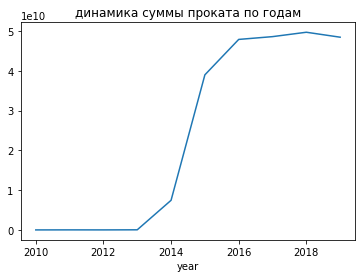

In [ ]:
films_sum= data.groupby(by='year')['box_office'].agg('sum')
films_sum.columns = ['sum']
films_sum.plot(title='динамика суммы проката по годам', y='sum');

print(films_sum)


- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

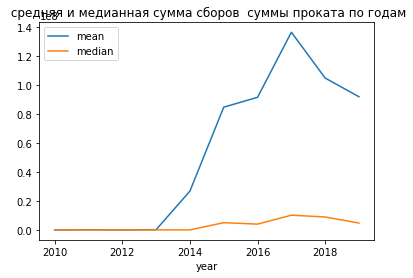

In [ ]:
films_m= data.groupby(by = 'year')['box_office'].agg({'mean','median'})
films_m.columns = ['mean','median']
films_m.plot(title=' средняя и медианная сумма сборов  суммы проката по годам',y=['mean','median']);

**Вывод:** После 2012 года медиана и среднее значение приципиально различаются, скорее всего это связано с ростом количества производимых фильмов, что ведет к разбросом данных параметров, так как для среднего любые выбивающие или редкие значения играют роль, в отличие от медианы.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

age_restriction
«0+» - для любой зрительской аудитории     379054578.37
«12+» - для детей старше 12 лет          14267291660.69
«16+» - для детей старше 16 лет          18745042900.06
«18+» - запрещено для детей              10121796303.64
«6+» - для детей старше 6 лет            12852513658.86
dtype: float64


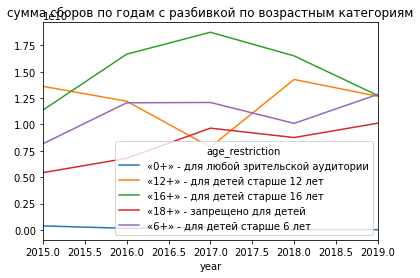

In [ ]:
data_age = data.pivot_table(index='year',columns='age_restriction',values='box_office',aggfunc='sum')
print(data_age.max())
data_age.plot(title='сумма сборов по годам с разбивкой по возрастным категориям',kind='line', xlim=[2015, 2019]);

**Вывод:** Фильмы 16+ собрали больше всего денег в прокате. Картина в зависимости от года меняется, скорее всего это связано с общим увелечением количества фильмов.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

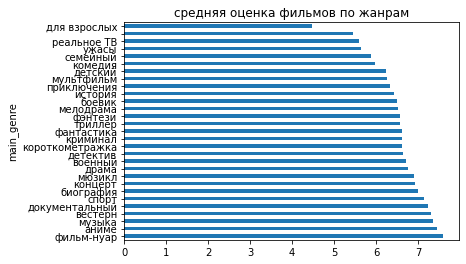

In [ ]:
data_rating = data.groupby(by = 'main_genre')['ratings'].agg('mean')
data_rating.columns = ['mean']
data_rating.sort_values(ascending=False).plot(title='средняя оценка фильмов по жанрам', kind='barh',orientation='horizontal');



**Вывод:** Наиболее высокая оценка у фильмов в жанре нуар, самая низкая у фильмов для взрослых.

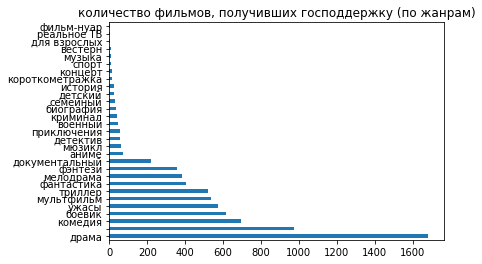

In [ ]:
data['main_genre'].value_counts().plot(title='количество фильмов, получивших господдержку (по жанрам)', kind='barh',orientation='horizontal');



**Вывод:**  Жанры фильмов, получившие больше всего господдержки, это драмы,меньше всего реальное ТВ.

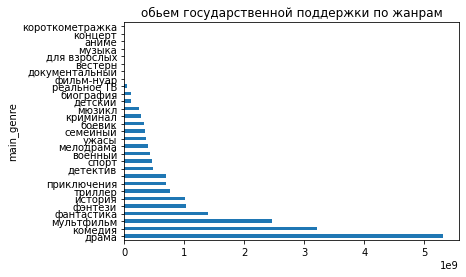

In [ ]:
data['full_support'] = data['refundable_support'] + data['nonrefundable_support']
data_support = data.groupby(by = 'main_genre')['full_support'].agg('sum')
data_support.columns = ['sum']

data_support.sort_values(ascending=False).plot(title='обьем государственной поддержки по жанрам', kind='barh',orientation='horizontal');

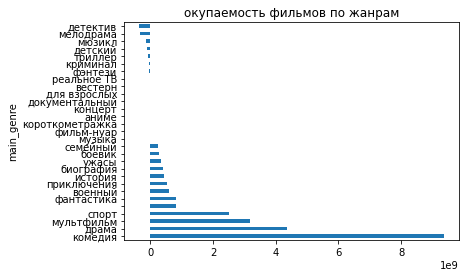

In [ ]:
data['income'] = data['box_office'] - data['full_support']
data_support = data.groupby(by = 'main_genre')['income'].agg('sum')
data_support.columns = ['sum']

data_support.sort_values(ascending=False).plot(title='окупаемость фильмов по жанрам', kind='barh',orientation='horizontal');

**Вывод:** Наиболее окупаемым жанром фильмов оказались комедии.

**Вывод:** Больше всего государственных бюджетных средтсв было выделено на фильмы в жанре драмы. В среднем их рейтинг выше 6 по 10-бальной шкале.
В среднем эти фильмы окупаются, однако по окупаемости они уступают комедиям. Фильмы в жанре комедия на втором месте по количеству выделеных денежных сред средств,по рейтингу они уступают драмам,однако самые окупаемые.

### Шаг 5. Напишите общий вывод

Было проведено исследовение, чтобы выявить текущие тренды на рынке российского кинопроката.
Входные данные - база,которая содержится два  датафрейм : данные о прокатных удостоверениях и данные о прокате в российских кинотеатрах.
Была выполнена необходимая предобработка данных: 1. изменен неверный тип данных. 2. выполнена работа с пропущеными значениями. 3. выявлены неявные дубликаты. 4. устранены ошибки в категориальных и количественных значениях. 5. добавлены столбцы для дальнейшего анализа данных.
Перед проведением исследования были поставлены несколько задач:
1.Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.
2.Как менялась динамика проката по годам.
3.Сравнить среднюю и медианную сумму сборов для каждого года.
4.Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год

Полнее всего данные по количеству фильмов в прокате представлены в 2016 и 2019 годах.
Начиная с 2010 года сумма прокатов по годам постоянно росла, соответсвенно минимальная сумма была в 2010 году(2 428 654), максимальная в 2018 году(4 966 681 591).
После 2012 года медиана и среднее значение суммы сборов приципиально различаются, скорее всего это связано с ростом количества производимых фильмов, что ведет к разбросом данных параметров, так как для среднего любые выбивающие или редкие значения играют роль, в отличие от медианы.
Фильмы 16+ собрали больше всего денег в прокате. Картина в зависимости от года меняется, скорее всего это связано с общим увелечением количества фильмов.

Больше всего государственных бюджетных средтсв было выделено на фильмы в жанре драмы. В среднем их рейтинг выше 6 по 10-бальной шкале.
В среднем эти фильмы окупаются, однако по окупаемости они уступают комедиям. Фильмы в жанре комедия на втором месте по количеству выделеных денежных сред средств,по рейтингу они уступают драмам,однако самые окупаемые.